<a href="https://colab.research.google.com/github/24361994/24361994/blob/main/Segmentaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Esta es la segunda parte del codigo
* lo primero es montar el drive en colab

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


* ahora importamos las librerias necesarias para el proceso

In [5]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
from tqdm.notebook import tqdm

np.random.seed(1)

* en esta parte traemos las imagenes mejoradas y rotadas

In [6]:
paths = glob.glob('/gdrive/My Drive/imagenes parte1/Grape*/*.JPG',recursive=True)
len(paths)

20

* asarray convierte los datos de entrada en un array, que en este caso seran las imagenes abiertas con image.open

* en el ciclo for desde img trae las cosas que estan en paths y dale forma

In [7]:
orig = np.array([np.asarray(Image.open(img)) for img in tqdm(paths)])
orig.shape

(20, 256, 256, 3)

* aqui se trajeron las 20 imagenes,en tonos de 256 colores en 3 canales RGB

* luego se enumeran del 0 al 16 y lo mismo que antes, se muestran los resultados

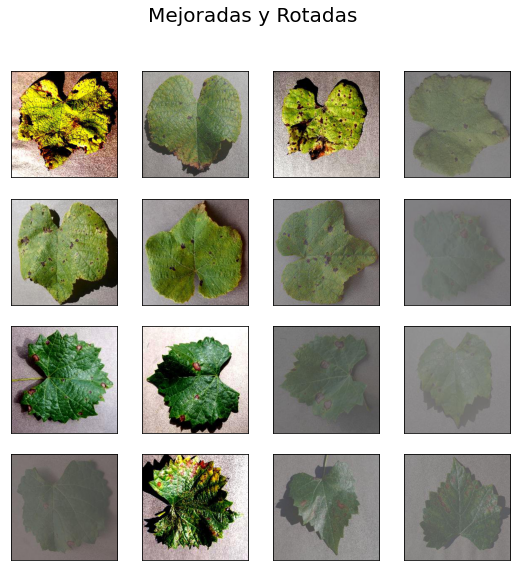

In [9]:
plt.figure(figsize=(9,9))

for i, img in enumerate(orig[0:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  
plt.suptitle("Mejoradas y Rotadas", fontsize=20)
plt.show()

* Ahora se transforman en tonos de grises las imagenes mejoradas y rotadas

In [10]:
gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in tqdm(orig)])
gray.shape

(20, 256, 256)

* y se plotean las imagenes en escala de grises

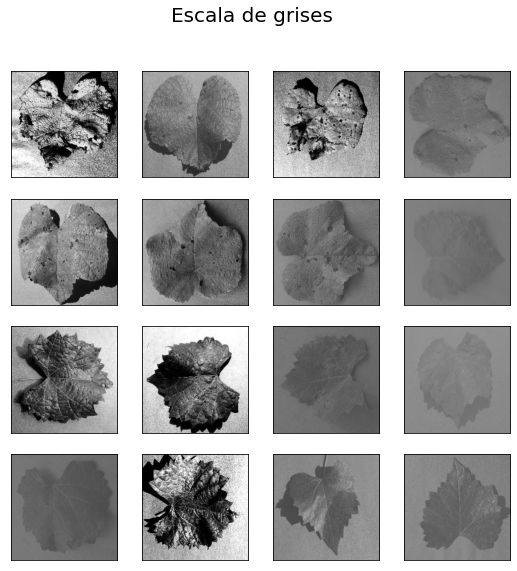

In [11]:
plt.figure(figsize=(9,9))

for i, img in enumerate(gray[0:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

plt.suptitle("Escala de grises", fontsize=20)
plt.show()

* lo habia entendido mal antes, esta matriz me muestra los extramos solo de la primera imagen, por eso el 255 sale en la esquina inferior izquierda y lo mas negro sale en la esquina superior derecha

In [12]:
gray[0]

array([[167, 159, 175, ...,  99,  85,  61],
       [139, 140, 168, ...,  99,  85,  67],
       [142, 142, 170, ...,  82,  74,  70],
       ...,
       [244, 251, 255, ..., 104,  44, 170],
       [251, 251, 251, ..., 104,  66, 155],
       [255, 251, 244, ..., 147, 169, 150]], dtype=uint8)

In [13]:
thresh = [cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV)[1] for img in tqdm(gray)]

* en esta parte por culpa de thresh_binary_inv los valores que estan mas altos se vuelven bajos y al reves

In [14]:
thresh[0]

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

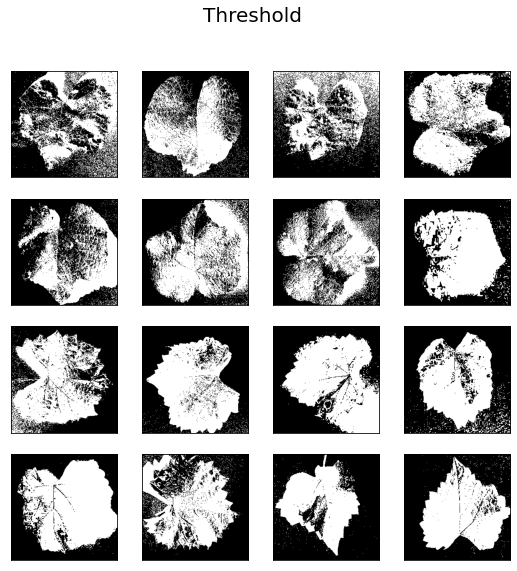

In [15]:
plt.figure(figsize=(9,9))

for i, threshimg in enumerate(thresh[0:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(threshimg,cmap='gray')

plt.suptitle("Threshold", fontsize=20)
plt.show()

# Aqui comienzan los Bordes

In [16]:
edges = [cv2.dilate(cv2.Canny(img, 0, 255), None) for img in tqdm(thresh)]

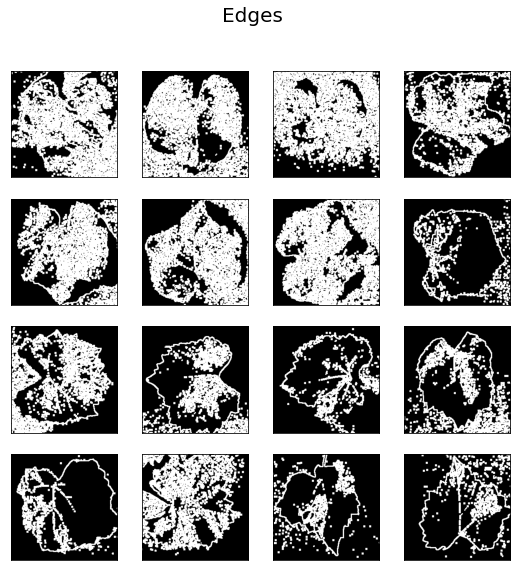

In [17]:
plt.figure(figsize=(9,9))

for i, edge in enumerate(edges[0:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(edge, cv2.COLOR_GRAY2RGB))  
  
plt.suptitle("Edges", fontsize=20)
plt.show()

# Ahora se crean las mascaras

In [18]:
masked=[]
segmented=[]

for i, img in tqdm(enumerate(edges)):
  cnt = sorted(cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
  mask = np.zeros((256,256), np.uint8)
  masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
  dst = cv2.bitwise_and(orig[i], orig[i], mask=mask)
  segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

* Se plotean los resultados

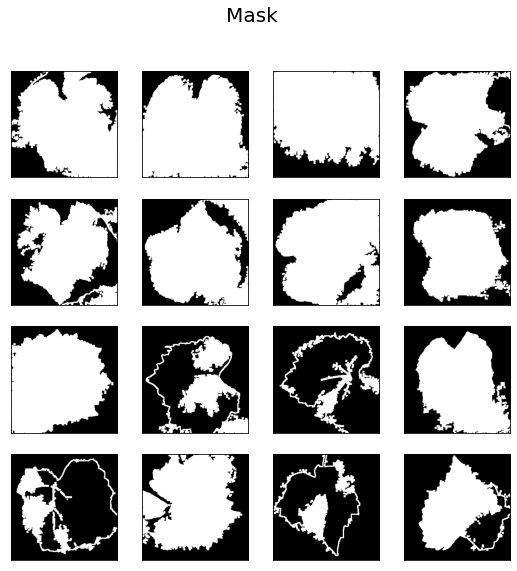

In [19]:
plt.figure(figsize=(9,9))

for i, maskimg in enumerate(masked[0:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(maskimg, cmap='gray')

plt.suptitle("Mask", fontsize=20)
plt.show()

# Ahora se superponen la mascara con la imagen original

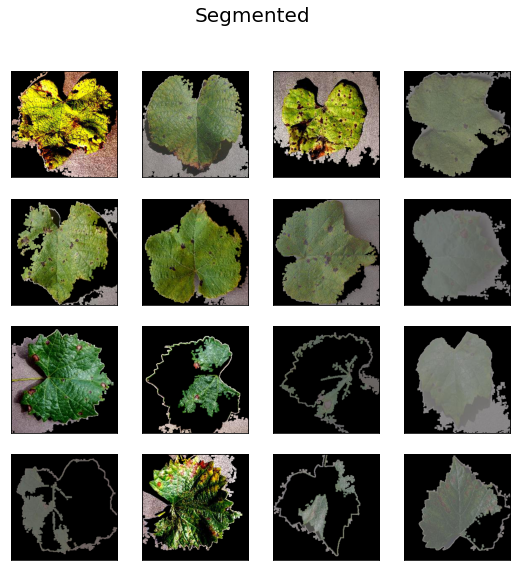

In [20]:
plt.figure(figsize=(9,9))

for i, segimg in enumerate(segmented[0:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(segimg, cv2.COLOR_BGR2RGB))
  
plt.suptitle("Segmented", fontsize=20)
plt.show()

* se guarda la segmentación

In [21]:
import os
for i, image in tqdm(enumerate(segmented)):
    directory = paths[i].rsplit('/', 3)[0] + '/segmentacion/' + paths[i].rsplit('/', 2)[1]+ '/'
    os.makedirs(directory, exist_ok = True)
    cv2.imwrite(directory + paths[i].rsplit('/', 2)[2], image)